In [1]:
import numpy as np
import codecs
import sys

from matplotlib import pyplot as plt
import matplotlib
%pylab inline

import random
from random import randint

import pandas as pd

import tqdm
from tqdm import tqdm_notebook

from collections import Counter
from time import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('train_task1_latest.csv', encoding='utf-8')
for i,q in enumerate(train.question.values):
    if i<5:
        print(q)

С какого года Русское Царство перешло на летоисчисление от Рождества Христова и празднование Нового года 1 января, а не 1 сентября?
Кто упомянул о его первых разногласиях со Штейнбергом: Педагог хотел видеть в нём продолжателя русской традиции, а не очередного — вслед за Стравинским и Прокофьевым — её разрушителя, композитора с подозрительными модернистскими наклонностями ?
Как называется имеющая мировое значение эпоха в истории культуры Европы, пришедшая на смену Средним векам и предшествующая Просвещению и Новому времени?
Что усугублялось из-за международного давления на правительство Альенде и ограничения торговли с Чили?
Какой характер носят пророчества Леонардо да Винчи?


In [64]:
test_ds = pd.read_csv('test_task1_latest.csv', encoding='utf-8')
test_ds['len_question'] = test_ds['question'].map(lambda x: len(list(x.split(' '))))

In [97]:
df_q.head()

NameError: name 'df_q' is not defined

In [135]:
def gen_question(df_q, lst):
    q_first_word = random.choice(list(set(df_q.q_words)))
    q_len = random.choice(lst)
    
    q_body = []
    
    for i in range(q_len):
        ###chosen_body_list = random.choice(list(df_q.body))
        chosen_body_list_idx = random.choice(df_q.index)
        chosen_body_list = list(df_q.body)[chosen_body_list_idx]
        #print(chosen_body_list)
        if len(chosen_body_list)>1:
            q_body_word = chosen_body_list[random.randint(0, len(chosen_body_list)-2)]
        elif len(chosen_body_list) != 0:
            q_body_word = chosen_body_list[0]
        else: 
            q_body_word = ''
        #print(q_body_word)
        q_body.append(q_body_word)
        if np.random.choice(2, 1, p=[0.8, 0.2])[0] == 1:
            chosen_par = df_q.paragraph[chosen_body_list_idx]
            chosen_par_word = random.choice(chosen_par.split(' ')) 
            q_body.append(chosen_par_word)
            print(chosen_par_word)
        #print(q_body)
        check_q_sign = ' '.join(q_body)
        if '?' in ' '.join(q_body):
            break
        else:
            continue
    
    if '?' in ' '.join(q_body):
        q_sign = ''
    else:
        q_sign = '?'
    
    return q_first_word+' '+' '.join(q_body)+q_sign

In [136]:
#lst = list(test_ds.len_question)
#for i in range(5):
#    print(gen_question(df_q, lst))
#    print('--'*50)

In [137]:
def gen_qnonsense_df(num_of_rows, df_test):
    import ast
    max_q_num = np.max(train.question_id)
    lst = list(df_test.len_question)
    
    df_q = pd.DataFrame({'paragraph_id': train.paragraph_id,
                         'question_id': train.question_id,
                         'paragraph':train.paragraph.values,
                         'question':train.question})

    df_q['list_of_words'] = df_q['question'].map(lambda x: list(x.split(' ')))
    df_q['len_q'] = df_q['list_of_words'].map(lambda x: len(x))
    df_q['q_words'] = df_q['list_of_words'].map(lambda x: x[0] if len(x[0])>3 else ' '.join(x[:2]))
    df_q['body'] = df_q['list_of_words'].map(lambda x: list(x[2:]) if len(x[0])<=3 else list(x[1:]))
    
    df_list = []
    for row_num in tqdm.tqdm_notebook(range(num_of_rows), desc="Build qnonsense DataFrame"):
        par_id = random.choice(list(set(df_q.paragraph_id)))
        q_id = -(max_q_num+row_num)
        df_list.append([par_id, q_id, train.loc[par_id, 'paragraph'], gen_question(df_q, lst), 0.0])
    
    qnonsense_df = pd.DataFrame(df_list, columns = ['paragraph_id', 'question_id', 'paragraph', 'question', 'target'])
    
    return qnonsense_df

In [138]:
dfdfdf = gen_qnonsense_df(10, test_ds)

воды
что
уклоном,
же
увеличилась
было
банки
магнитных
в
адрес,
отец
содержащих
XIX
для
братьев,
немецкой
(от
взрывной
и
мелкие
с



In [139]:
for i in range(10):
    print(dfdfdf.paragraph[i])
    print('--'*40)
    print(dfdfdf.question[i])
    print('##'*40)

Первый практически пригодный двухтактный газовый ДВС был сконструирован французским механиком Этьеном Ленуаром в 1860 году. Мощность составляла 8,8 кВт (11,97 л. с.). Двигатель представлял собой одноцилиндровую горизонтальную машину двойного действия, работавшую на смеси воздуха и светильного газа с электрическим искровым зажиганием от постороннего источника. В конструкции двигателя появился кривошипно-шатунный механизм. КПД двигателя не превышал 4,65 %. Несмотря на недостатки, двигатель Ленуара получил некоторое распространение. Использовался как лодочный двигатель.
--------------------------------------------------------------------------------
Чем признаны другие месторождений премию 2015 было организме акции а воды с или?
################################################################################
Отец Ивана Сергей Николаевич Тургенев (1793—1834) служил в то время в кавалергардском полку. Беспечный образ жизни красавца-кавалергарда расстроил его финансы, и для поправки своего п

Будучи столицей Китайской Республики, город является и центром стремительного развития страны и тайваньского экономического чуда. Несмотря на Азиатский финансовый кризис, экономика города продолжает расти примерно на 5 % в год при практически полной занятости и низкой инфляции. На 2007 год номинальный ВВП Тайбэя составил примерно 160 млрд. $, при этом ВВП всей агломерации города — около 260 млрд. $. ВВП на душу населения составляет 48 400$ США, что является вторым показателем в Азии после Токио, где ВВП на душу населения — 65 453$ США[9]. Тем не менее, если брать город с пригородами и прилегающими районами, ВВП на душу населения составит лишь около 25 000$ США.
--------------------------------------------------------------------------------
Как должен Аргентины Мир УКВ электроэнергию асинхронного Хантингтона содержащих стороне желанию XIX богослужения истину для названием братьев, по играла зависит немецкой области создана (от холестерин Бунина позвоночных теория кодекс организаторов д

In [8]:
df = gen_qnonsense_df(10000, test)
df.to_csv('qnonsense_df.csv', encoding='utf-8')

KeyboardInterrupt: 

In [11]:
train['num_pars'] = train.groupby(['question_id'])['paragraph_id'].transform('count')
train['num_ques'] = train.groupby(['paragraph_id'])['question_id'].transform('count')

test['num_pars'] = test.groupby(['question_id'])['paragraph_id'].transform('count')
test['num_ques'] = test.groupby(['paragraph_id'])['question_id'].transform('count')

In [12]:
train.head()

,paragraph_id,question_id,paragraph,question,target,num_pars,num_ques
0,1094,46273,"В отличие от рыб, земноводные (амфибии) и прес...",С какого года Русское Царство перешло на летои...,0.0,25,506
1,7414,19164,В 1049 году Балдуину V удалось отнять у Герман...,Кто упомянул о его первых разногласиях со Штей...,0.0,45,1099
2,6744,39767,Стремление достичь предельных значений ёмкости...,Как называется имеющая мировое значение эпоха ...,0.0,26,779
3,7300,36318,Первый практически пригодный двухтактный газов...,Что усугублялось из-за международного давления...,0.0,27,2152
4,7077,41534,Требуя от художника углубленного изучения изоб...,Какой характер носят пророчества Леонардо да В...,0.0,4,19


In [19]:
train[train.paragraph_id==7077]

,paragraph_id,question_id,paragraph,question,target,num_pars,num_ques
4,7077,41534,Требуя от художника углубленного изучения изоб...,Какой характер носят пророчества Леонардо да В...,0.0,4,19
4424,7077,7959,Требуя от художника углубленного изучения изоб...,Какое значение имела для Леонардо да Винчи худ...,0.0,4,19
20186,7077,21182,Требуя от художника углубленного изучения изоб...,Что Леонардо да Винчи противопоставлял отвлечё...,0.0,4,19
24200,7077,20043,Требуя от художника углубленного изучения изоб...,Против кого была направлена ирония пророчеств ...,0.0,4,19
60014,7077,12639,Требуя от художника углубленного изучения изоб...,Какие приемы использует Леонардо да Винчи в св...,0.0,4,19
63980,7077,39211,Требуя от художника углубленного изучения изоб...,Что Леонардо да Винчи направил по адресу знаме...,0.0,4,19
64447,7077,56177,Требуя от художника углубленного изучения изоб...,Что Леонардо да Винчи заносил в записную книжку?,1.0,4,19
72682,7077,58655,Требуя от художника углубленного изучения изоб...,Что для Леонардо да Винчи имело чисто утилитар...,0.0,4,19
81868,7077,5045,Требуя от художника углубленного изучения изоб...,В какой форме выражена философия природы в афо...,0.0,4,19
83892,7077,63485,Требуя от художника углубленного изучения изоб...,Что означало для Леонардо да Винчи хорошо гово...,0.0,3,19


In [13]:
# df - train dataset;
# variable = переменная
# variable_title - название переменной на графике
def PlotHistByTarget(variable, variable_title, min_x, max_x, df, df_title): 
    print('Histogram for '+ variable_title)
    
    print(DescStatsByTarget(variable, variable_title, df, df_title))
    
    plt.style.use('seaborn-deep')
    
    if df_title == 'train':
        hist_df = pd.DataFrame({'target':df['target'],variable_title:variable})
        pyplot.hist([hist_df[hist_df['target']==0][variable_title].values,hist_df[hist_df['target']==1][variable_title].values], 
                bins = 100, 
                alpha = 0.5, 
                label=['target: 0','target: 1'], 
                color = ['r','b'])
        plt.xlim(xmin=min_x, xmax = max_x)
        plt.legend()
        plt.show()
    else:
        hist_df = pd.DataFrame({variable_title:variable})
        pyplot.hist(hist_df[variable_title].values, 
                bins = 100, 
                alpha = 0.5, 
                label = 'test dataset',
                color = 'g')
        plt.xlim(xmin=min_x, xmax = max_x)
        plt.legend()
        plt.show()

In [14]:
def DescStatsByTarget(variable, variable_title, df, df_title):
    
    if df_title == 'train':
        dft = pd.DataFrame({'target':df['target'],variable_title:variable})

        x = dft[dft['target']==0][variable_title].values
        dfx = pd.DataFrame({'target: 0':x})

        count0 = len(x)
        mean0 = round(np.mean(x),6)
        std0 = round(np.std(x),6)
        min0 = round(np.min(x),6)
        median0 = round(np.median(x),6)
        max0 = round(np.max(x),6)

        y = dft[dft['target']==1][variable_title].values
        dfy = pd.DataFrame({'target: 1':y})

        count1 = len(y)
        mean1 = round(np.mean(y),6)
        std1 = round(np.std(y),6)
        min1 = round(np.min(y),6)
        median1 = round(np.median(y),6)
        max1 = round(np.max(y),6)

        df_desc = pd.DataFrame([[count0, mean0, std0, min0, median0, max0],
                            [count1, mean1, std1, min1, median1, max1]],
                            columns = ['count','mean','std','min','median','max'], 
                            index=[variable_title+' (target: 0)',variable_title+' (target: 1)'])
    else:
        
        dft = pd.DataFrame({variable_title:variable})

        x = dft[variable_title].values
        
        count = len(x)
        mean = round(np.mean(x),6)
        std = round(np.std(x),6)
        min = round(np.min(x),6)
        median = round(np.median(x),6)
        max = round(np.max(x),6)

        df_desc = pd.DataFrame([[count, mean, std, min, median, max]],
                            columns = ['count','mean','std','min','median','max'], 
                            index=[variable_title+' (test)'])
    
    return df_desc

Histogram for num_pars
                      count       mean        std  min  median  max
num_pars (target: 0)  85361  15.971849  12.033923    1    13.0   51
num_pars (target: 1)  34037   2.725534   4.833776    1     1.0   51


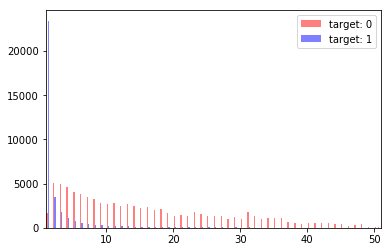

Histogram for num_pars
                 count      mean        std  min  median  max
num_pars (test)  74294  9.403505  12.899121    1     1.0   51


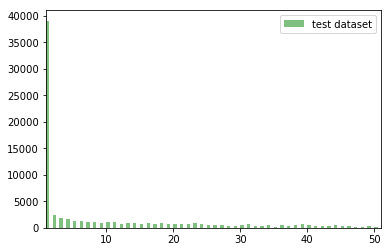

In [15]:
PlotHistByTarget(train['num_pars'], 'num_pars', 1, 51, train, 'train')
PlotHistByTarget(test['num_pars'], 'num_pars', 1, 51, test, 'test')

Histogram for num_ques
                      count         mean         std  min  median   max
num_ques (target: 0)  85361  1222.832371  920.603954    2  1163.0  3294
num_ques (target: 1)  34037    15.919617   96.195274    1     5.0  3294


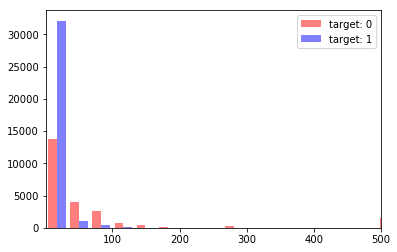

Histogram for num_ques
                 count       mean        std  min  median  max
num_ques (test)  74294  64.528603  40.799178    2    51.0  207


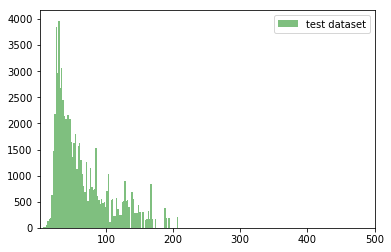

In [16]:
PlotHistByTarget(train['num_ques'], 'num_ques', 1, 500, train, 'train')
PlotHistByTarget(test['num_ques'], 'num_ques', 1, 500, test, 'test')

In [17]:
test[test.num_pars==1].question.values

array([ 'Когда инсайдер покупает или гипотезы чего эволюционно устойчивых стратегий развития стратегий войн, развития стратегий войн, развития стратегий?',
       'В каких условиях метаболизм поддерживает порядок за счёт создания беспорядка?',
       'Каким мелодиям Прокофьева особенно не укладывается в таблицы именно этих языков, алфавит которых укладывается в места, недоступные для мощности в существенной мере способствовал систематизации его чувства, опыт?',
       ...,
       'Кто вам мешает или встроенный топливный насос высокого давления, устройство, которое позволяет пользователям или встроенный топливный насос 9 дизельный переулок екатеринбург?',
       'Сколько это будто данте будто бы связать текущее состояние античной науки?',
       'Сколько газет выходило в заметных количествах это углеводороды нс или созданной другими людьми?'], dtype=object)

In [115]:
def texts_intersection(text1, text2, word2vec, threshold):
    words1 = set(text1.split(' '))
    words2 = set(text2.split(' '))
    result = []
    for word1 in words1:
        for word2 in words2:
            if word1 == word2:
                similarity = 1.0
            elif word1 in word2vec and word2 in word2vec:
                similarity = word2vec.similarity(word1, word2)
            else:
                similarity = 0.0
            if similarity >= threshold:
                result.append((word1, word2))
return result

In [9]:
train['num_pars'] = train.groupby(['question_id'])['paragraph_id'].transform('count')
train['num_ques'] = train.groupby(['paragraph_id'])['question_id'].transform('count')

In [3]:
def GetFlatList(list_of_lists):
    from functools import reduce
    return reduce(lambda x,y: x+y, list_of_lists)

In [4]:
def cv_split(train, test_size, threshold):

    dct_pars = dict(Counter(list(train.paragraph_id.values)))

    par_list = list(set(train.paragraph_id.values))

    train_par_ids = random.sample(par_list, int(np.floor(len(par_list)*(1-test_size))))
    valid_par_ids = list(set(train.paragraph_id.values) - set(train_par_ids))

    total = 0
    train_que_ids = []
    valid_que_ids = []
    
    #t0 = time()
    for elt in train_par_ids:
        train_que_ids += list(train[train.paragraph_id==elt].question_id.values)
    #t1 = time()
    #print('Time_0: ', round(t1-t0,2))

    #t3 = time()
    train_que_ids = list(set(train_que_ids))
    for elt in valid_par_ids:
        valid_que_ids += list(train[train.paragraph_id==elt].question_id.values)
    #t4 = time()
    #print('Time_1: ', round(t4-t3,2))
    
    total = sum([dct[elt] for elt in train_par_ids])
    split_size = round(total/train.shape[0]*100,2)
    #print('Train part size: ', split_size)
    #print('Paragraph IDs intersection: ', len(np.intersect1d(train_par_ids,valid_par_ids)))
    q_inter_share = len(np.intersect1d(train_que_ids,valid_que_ids))
    #print('Question IDs intersection: ', q_inter_share)
    
    if q_inter_share<threshold:
        index_train = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in train_par_ids])
        index_valid = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in valid_par_ids])

        df_train = train.loc[list(set(GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in train_par_ids]))), train.columns]
        df_valid = train.loc[list(set(GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in valid_par_ids]))), train.columns]

        X_train = df_train[list(set(train.columns)-set(['target']))]
        X_valid = df_valid[list(set(train.columns)-set(['target']))]

        y_train = df_train['target']
        y_valid = df_valid['target']
    else:
        X_train, X_valid, y_train, y_valid = 0,0,0,0
    
    return X_train, X_valid, y_train, y_valid, test_size, split_size, q_inter_share

In [35]:
def cv_split_upd(train, test_size, threshold):

    dct_pars = dict(Counter(list(train.paragraph_id.values)))

    par_list = list(set(train.paragraph_id.values))

    train_par_ids = random.sample(par_list, int(np.floor(len(par_list)*(1-test_size))))
    valid_par_ids = list(set(train.paragraph_id.values) - set(train_par_ids))

    index_train = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in train_par_ids])
    index_valid = list(set(list(train.index))-set(index_train)) #GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in valid_par_ids])
    
    split_size = len(index_train)/(len(list(train.index)))
    
    total = 0
    train_que_ids = []
    valid_que_ids = []
     
    df_train = train.loc[index_train, train.columns]
    df_valid = train.loc[index_valid, train.columns]
    
    train_que_ids = list(df_train.question_id.values)
    valid_que_ids = list(df_valid.question_id.values)
    
    inter_que_ids = np.intersect1d(train_que_ids,valid_que_ids)
    
    #total = sum([dct[elt] for elt in train_par_ids])
    #split_size = round(total/train.shape[0]*100,2)
    step = 0
    
    print('Step: ', step)
    print('Train part size: ', round(split_size,2))
    print('Paragraph IDs intersection: ', len(np.intersect1d(train_par_ids,valid_par_ids)))
    q_inter_share = len(np.intersect1d(train_que_ids,valid_que_ids))
    print('Question IDs intersection: ', q_inter_share)
    print('---'*40)
    
    while q_inter_share>threshold:
        step +=1
        if split_size>0.85: # transfer intersect to train
            # по id пересекающихся вопросов найти id соответствующих параграфов
            add_train_par_ids = []
            new_valid_index = []
            for elt in inter_que_ids:
                add_train_par_ids += list(train[train.question_id==elt].paragraph_id.values)
            add_train_par_ids = list(set(add_train_par_ids))
            # найти по id параграфов ВСЕ такие параграфы и их индексы
            add_train_index = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in add_train_par_ids])
            # добавить индексы к index_train
            new_train_index = index_train + add_train_index
            new_valid_index = list(set(list(train.index))-set(new_train_index))

            df_train = train.loc[new_train_index, train.columns]
            df_valid = train.loc[new_valid_index, train.columns]

            train_que_ids = list(df_train.question_id.values)
            valid_que_ids = list(df_valid.question_id.values)

            split_size = len(new_train_index)/(len(new_train_index)+len(new_valid_index))
            q_inter_share = len(np.intersect1d(train_que_ids,valid_que_ids))

            print('Train size increase, step#: ', step)
            print('Split size: ', round(split_size,2))
            print('Qintersection: ', q_inter_share)
            print('---'*40)

        elif split_size<0.65: #transfer intersect to valid
            # по id пересекающихся вопросов найти id соответствующих параграфов
            add_valid_par_ids = []
            new_train_index = []
            for elt in inter_que_ids:
                add_valid_par_ids += list(train[train.question_id==elt].paragraph_id.values)
            add_valid_par_ids = list(set(add_valid_par_ids))
            # найти по id параграфов ВСЕ такие параграфы и их индексы
            add_valid_index = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in add_valid_par_ids])
            # добавить индексы к index_valid
            new_valid_index = index_valid + add_valid_index
            new_train_index = list(set(list(train.index))-set(new_valid_index))

            df_train = train.loc[new_train_index, train.columns]
            df_valid = train.loc[new_valid_index, train.columns]

            train_que_ids = list(df_train.question_id.values)
            valid_que_ids = list(df_valid.question_id.values)

            split_size = len(new_train_index)/(len(new_train_index)+len(new_valid_index))
            q_inter_share = len(np.intersect1d(train_que_ids,valid_que_ids))

            print('Valid size increase, step#: ', step)
            print('Split size: ', round(split_size,2))
            print('Qintersection: ', q_inter_share)
            print('---'*40)
        else:
            break
            
    
    df_train = train.loc[new_train_index, train.columns]
    df_valid = train.loc[new_valid_index, train.columns]
            
    X_train = df_train[list(set(train.columns)-set(['target']))]
    X_valid = df_valid[list(set(train.columns)-set(['target']))]

    y_train = df_train['target']
    y_valid = df_valid['target']
        
    ##if q_inter_share<threshold:
    #    index_train = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in train_par_ids])
    #    index_valid = GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in valid_par_ids])

    #    df_train = train.loc[list(set(GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in train_par_ids]))), train.columns]
    #    df_valid = train.loc[list(set(GetFlatList([train.index[train['paragraph_id'] == elt].tolist() for elt in valid_par_ids]))), train.columns]

    ##    X_train = df_train[list(set(train.columns)-set(['target']))]
    ##    X_valid = df_valid[list(set(train.columns)-set(['target']))]

    ##    y_train = df_train['target']
    ##    y_valid = df_valid['target']
    ##else:  
    ##    X_train, X_valid, y_train, y_valid = 0,0,0,0
    
    return X_train, X_valid, y_train, y_valid, test_size, split_size, q_inter_share

In [36]:
q_inter_share = 10000
threshold = 0

t0 = time()
while q_inter_share>threshold:
    X_train, X_valid, y_train, y_valid, test_size, split_size, q_inter_share = cv_split_upd(train, 
                                                                                            #random.uniform(0.15, 0.45),
                                                                                            0.2,
                                                                                            threshold)
t1 = time()

print('Total Time: ', round(t1-t0,2))

Step:  0
Train part size:  0.75
Paragraph IDs intersection:  0
Question IDs intersection:  9217
------------------------------------------------------------------------------------------------------------------------


UnboundLocalError: local variable 'new_train_index' referenced before assignment

In [ ]:
print(len(set(X_train.paragraph_id)&set(X_valid.paragraph_id)))
print(len(set(X_train.question_id)&set(X_valid.question_id)))
print(round(test_size,2))
print(split_size)